# Árvores II - Tarefa 2

### 1. Carregar as bases

Vamos carregar as bases lidas na tarefa passada. Se você salvou essas bases em arquivo texto, basta fazer a leitura com o comando ```pd.read_csv``` das seguintes bases:

- X_train
- Y_train
- X_test
- Y_test

Não se esqueça de considerar a leitura dos índices dos arquivos no ```read_csv()```!

In [56]:
import pandas            as pd 
import numpy             as np 
import seaborn           as sns
import matplotlib.pyplot as plt


from sklearn.tree            import DecisionTreeClassifier
from sklearn.metrics         import accuracy_score
from sklearn.metrics         import confusion_matrix, ConfusionMatrixDisplay
from sklearn.model_selection import train_test_split
#from sklearn.metrics         import plot_confusion_matrix

### Carregando as bases lidas na tarefa anterior com seus respectivos índices

In [38]:
# Carregar os dados de treinamento
X_train = (pd.read_csv("./X_train.csv"))
print(X_train.size)
X_train = X_train.drop(['record', 'subject'], axis=1)

X_train

4138613


,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,tBodyAcc-max()-X,...,fBodyBodyGyroJerkMag-meanFreq(),fBodyBodyGyroJerkMag-skewness(),fBodyBodyGyroJerkMag-kurtosis(),"angle(tBodyAccMean,gravity)","angle(tBodyAccJerkMean),gravityMean)","angle(tBodyGyroMean,gravityMean)","angle(tBodyGyroJerkMean,gravityMean)","angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)"
0,0.288585,-0.020294,-0.132905,-0.995279,-0.983111,-0.913526,-0.995112,-0.983185,-0.923527,-0.934724,...,-0.074323,-0.298676,-0.710304,-0.112754,0.030400,-0.464761,-0.018446,-0.841247,0.179941,-0.058627
1,0.278419,-0.016411,-0.123520,-0.998245,-0.975300,-0.960322,-0.998807,-0.974914,-0.957686,-0.943068,...,0.158075,-0.595051,-0.861499,0.053477,-0.007435,-0.732626,0.703511,-0.844788,0.180289,-0.054317
2,0.279653,-0.019467,-0.113462,-0.995380,-0.967187,-0.978944,-0.996520,-0.963668,-0.977469,-0.938692,...,0.414503,-0.390748,-0.760104,-0.118559,0.177899,0.100699,0.808529,-0.848933,0.180637,-0.049118
3,0.279174,-0.026201,-0.123283,-0.996091,-0.983403,-0.990675,-0.997099,-0.982750,-0.989302,-0.938692,...,0.404573,-0.117290,-0.482845,-0.036788,-0.012892,0.640011,-0.485366,-0.848649,0.181935,-0.047663
4,0.276629,-0.016570,-0.115362,-0.998139,-0.980817,-0.990482,-0.998321,-0.979672,-0.990441,-0.942469,...,0.087753,-0.351471,-0.699205,0.123320,0.122542,0.693578,-0.615971,-0.847865,0.185151,-0.043892
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7346,0.237966,-0.001088,-0.148326,-0.218949,-0.012927,0.170019,-0.309599,-0.041392,0.207454,0.210795,...,-0.028664,-0.592488,-0.867236,0.352776,-0.604817,-0.774783,0.730142,-0.797272,0.234996,0.048907
7347,0.299665,-0.057193,-0.181233,-0.195387,0.039905,0.077078,-0.282301,0.043616,0.060410,0.210795,...,-0.070157,-0.588433,-0.880324,-0.190437,0.829718,0.206972,-0.425619,-0.791883,0.238604,0.049819
7348,0.273853,-0.007749,-0.147468,-0.235309,0.004816,0.059280,-0.322552,-0.029456,0.080585,0.117440,...,0.165259,-0.390738,-0.680744,0.064907,0.875679,-0.879033,0.400219,-0.771840,0.252676,0.050053
7349,0.273387,-0.017011,-0.045022,-0.218218,-0.103822,0.274533,-0.304515,-0.098913,0.332584,0.043999,...,0.195034,0.025145,-0.304029,0.052806,-0.266724,0.864404,0.701169,-0.779133,0.249145,0.040811


In [39]:
y_train = (pd.read_csv('./y_train.txt'))
y_train

,5
0,5
1,5
2,5
3,5
4,5
...,...
7346,2
7347,2
7348,2
7349,2


In [40]:
# Carregando os dados de teste
X_test = pd.read_csv('./X_test.csv')
print(X_test.size)
X_test

1658598


,record,subject,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,...,fBodyBodyGyroJerkMag-meanFreq(),fBodyBodyGyroJerkMag-skewness(),fBodyBodyGyroJerkMag-kurtosis(),"angle(tBodyAccMean,gravity)","angle(tBodyAccJerkMean),gravityMean)","angle(tBodyGyroMean,gravityMean)","angle(tBodyGyroJerkMean,gravityMean)","angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)"
0,0,2,0.257178,-0.023285,-0.014654,-0.938404,-0.920091,-0.667683,-0.952501,-0.925249,...,0.071645,-0.330370,-0.705974,0.006462,0.162920,-0.825886,0.271151,-0.720009,0.276801,-0.057978
1,1,2,0.286027,-0.013163,-0.119083,-0.975415,-0.967458,-0.944958,-0.986799,-0.968401,...,-0.401189,-0.121845,-0.594944,-0.083495,0.017500,-0.434375,0.920593,-0.698091,0.281343,-0.083898
2,2,2,0.275485,-0.026050,-0.118152,-0.993819,-0.969926,-0.962748,-0.994403,-0.970735,...,0.062891,-0.190422,-0.640736,-0.034956,0.202302,0.064103,0.145068,-0.702771,0.280083,-0.079346
3,3,2,0.270298,-0.032614,-0.117520,-0.994743,-0.973268,-0.967091,-0.995274,-0.974471,...,0.116695,-0.344418,-0.736124,-0.017067,0.154438,0.340134,0.296407,-0.698954,0.284114,-0.077108
4,4,2,0.274833,-0.027848,-0.129527,-0.993852,-0.967445,-0.978295,-0.994111,-0.965953,...,-0.121711,-0.534685,-0.846595,-0.002223,-0.040046,0.736715,-0.118545,-0.692245,0.290722,-0.073857
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2941,2941,24,0.192275,-0.033643,-0.105949,-0.354841,-0.092504,-0.312910,-0.433579,-0.088741,...,0.158728,-0.629657,-0.916493,0.535983,0.689306,-0.936606,0.562375,-0.646754,0.282150,0.181152
2942,2942,24,0.310155,-0.053391,-0.099109,-0.287866,-0.140589,-0.215088,-0.356083,-0.148775,...,0.074472,-0.376278,-0.750809,-0.337422,0.346295,0.884904,-0.698885,-0.651732,0.274627,0.184784
2943,2943,24,0.363385,-0.039214,-0.105915,-0.305388,0.028148,-0.196373,-0.373540,-0.030036,...,0.101859,-0.320418,-0.700274,-0.736701,-0.372889,-0.657421,0.322549,-0.655181,0.273578,0.182412
2944,2944,24,0.349966,0.030077,-0.115788,-0.329638,-0.042143,-0.250181,-0.388017,-0.133257,...,-0.066249,-0.118854,-0.467179,-0.181560,0.088574,0.696663,0.363139,-0.655357,0.274479,0.181184


In [41]:
y_test = (pd.read_csv('./y_test.txt'))
y_test

,5
0,5
1,5
2,5
3,5
4,5
...,...
2941,2
2942,2
2943,2
2944,2


### 2. Divisão da base em Treino, Validação e Teste

A base já se encontra dividida em Treino e Validação. O que vamos fazer então é extrair uma base de Validação da base de Treino.

Extraia 25% da base de treino como base de validação.

In [42]:
X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train, test_size=.25, random_state=2025)

In [43]:
print('X_train:', X_train.shape)
print('y_train:', y_train.shape)

print('X_valid:', X_valid.shape)
print('y_valid:', y_valid.shape)

print('X_test:', X_test.shape)
print('y_test:', y_test.shape)

X_train: (5513, 561)
y_train: (5513, 1)
X_valid: (1838, 561)
y_valid: (1838, 1)
X_test: (2946, 563)
y_test: (2946, 1)


### 3. Melhores 3 variáveis

Rode uma árvore com profundidade máxima igual a 4 para prever a atividade humana com todas as variáveis.
Observe a importância das variáveis e considere as 3 variáveis com maior importância para os próximos passos.
Dica: utilize o atributo ```clf.feature_importances_``` da árvore treinada.

In [44]:
# Rodando uma árvore com profundidade igual a 4
clf = DecisionTreeClassifier(max_depth=4, random_state=2025)
clf.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=4, random_state=2025)

In [45]:
importances = clf.feature_importances_
indices_desc = np.argsort(importances)[::-1]  

# Listar as 3 variáveis mais importantes
top3_indices = indices_desc[:3]
top3_scores = importances[top3_indices]

columns = X_train.columns
top3_feature_names = [columns[i] for i in top3_indices]

print("As três variáveis mais importantes são:")
print(top3_feature_names)
#for feature in top3_features:
   # print(feature)

As três variáveis mais importantes são:
['tGravityAcc-min()-X', 'fBodyAccJerk-bandsEnergy()-1,8', 'angle(Y,gravityMean)']


### 4. Construa uma árvore com as 3 melhores variáveis

Utilizando as três variáveis encontradas acima, construa uma árvore de decisão. Encontre o melhor ```ccp_alpha``` utilizando a base de validação, conforme a estrutura que vimos em aula.

In [58]:
%%time
# Selecionar as 3 melhores variáveis
melhores_var = ['tGravityAcc-min()-X', 'fBodyAccJerk-bandsEnergy()-1,8', 'angle(Y,gravityMean)']  

X_train_sel = X_train[melhores_var]
X_val_sel   = X_valid[melhores_var]
X_test_sel  = X_test[melhores_var]


CPU times: total: 0 ns
Wall time: 2 ms


In [47]:
caminho = DecisionTreeClassifier(random_state=2025).cost_complexity_pruning_path(X_train_sel, y_train)
ccp_alphas, impurities = caminho.ccp_alphas, caminho.impurities

In [48]:
ccp_alphas = np.unique(ccp_alphas[ccp_alphas>0])

clfs = []

#Treinando árvores com os CCP_Alphas encontrados
for ccp_alpha in ccp_alphas:
    clf1 = DecisionTreeClassifier(ccp_alpha=ccp_alpha, random_state=2025)
    clf1.fit(X_train_sel, y_train)
    clfs.append(clf1)


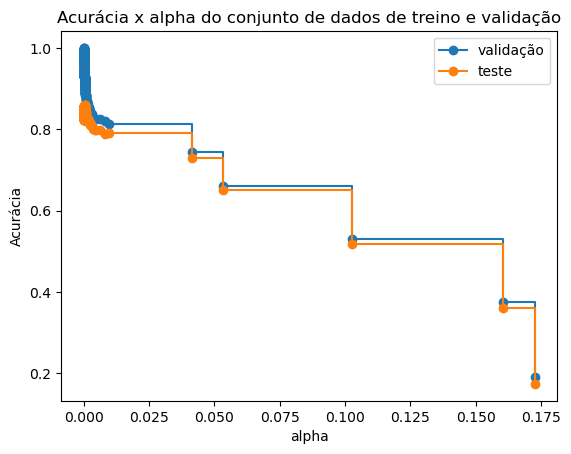

In [51]:
train_score = [clf.score(X_train_sel, y_train) for clf in clfs]
valid_score = [clf.score(X_val_sel, y_valid) for clf in clfs]

fig, ax = plt.subplots()
ax.set_xlabel("alpha")
ax.set_ylabel("Acurácia")
ax.set_title("Acurácia x alpha do conjunto de dados de treino e validação")
ax.plot(ccp_alphas, train_score, marker='o', label="validação",
        drawstyle="steps-post")
ax.plot(ccp_alphas, valid_score, marker='o', label="teste",
        drawstyle="steps-post")
ax.legend()
plt.show()

In [52]:
ind_melhor_arvore = len(valid_score) - valid_score[::-1].index(max(valid_score)) - 1
melhor_arvore = clfs[ind_melhor_arvore]

print(f'Acurácia da melhor árvore na base de validação: {valid_score[ind_melhor_arvore]*100:.2f}')
melhor_arvore

Acurácia da melhor árvore na base de validação: 85.91


DecisionTreeClassifier(ccp_alpha=0.0004289921129614076, random_state=2025)

### 5. Avaliação do modelo

Avalie a árvore encontrada no item anterior na base de testes.

Acurácia: 70.03


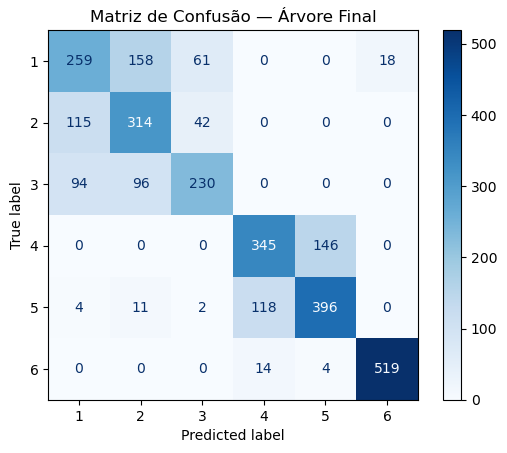

In [61]:
cm = confusion_matrix(y_test, melhor_arvore.predict(X_test_sel))
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=melhor_arvore.classes_)

acuracia_teste = melhor_arvore.score(X_test_sel, y_test)
print(f'Acurácia: {acuracia_teste*100:.2f}')

disp.plot(cmap='Blues')
plt.title("Matriz de Confusão — Árvore Final")
plt.show()